# Equity Analysis with Python - Introduction (Part 2)

Note: __yfinance can be unstable/unreliable from time to time__ when it comes to downloading fundamental data with the ticker object. In particular, __ticker.get_info()__ can be flawed.

__Action required__: Check for the __latest yfinance versions__ and update with the following command (Anaconda Prompt / Terminal):

pip install yfinance --upgrade

In the following, I have added an __alternative Yahoo Finance API Wrapper__, __yahooquery__

__Action required: Please install yahooquery with the following command (Anaconda Prompt / Terminal):__

pip install yahooquery --upgrade

Note: 
- Please make sure you have installed the __latest__ yahooquery version (if not, please upgrade). 

__Update December 2023__: Sometimes yfinance is more stable/reliable and sometimes yahooquery is more stable/reliable. Most recently, yfinance seemed to be better. In any case, __please make sure you have the latest versions installed!__

## Ticker Object

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from yahooquery import Ticker  
plt.style.use("seaborn-v0_8")

__yfinance__

In [ ]:
aapl = yf.Ticker(ticker = "AAPL")
aapl

In [ ]:
aapl.history() # historical price and volume data

In [ ]:
aapl.get_info()

In [ ]:
info = pd.Series(aapl.get_info())
info

In [ ]:
info.head(50)

In [ ]:
#aapl.

__NEW__ (Jan 2023): get_fast_info (before: fast_info, now: get_fast_info())

In [ ]:
aapl.fast_info # OLD

In [ ]:
fast_info = aapl.get_fast_info() # NEW! before: fast_info
fast_info

In [ ]:
fast_info["currency"]

In [ ]:
fast_info["lastPrice"]

__yahooquery__

In [ ]:
yq = Ticker(symbols = "AAPL")  
yq

In [ ]:
yq.key_stats["AAPL"] # key statistics

In [ ]:
yq.financial_data["AAPL"] # financial data

In [ ]:
yq.summary_detail["AAPL"] # summary statistics

## Price, Shares Outstanding & Market Capitalization

In [ ]:
info # yfinance Alt1

In [ ]:
fast_info  # yfinance Alt2

__Market Capitalization__

In [ ]:
market_cap = info.marketCap #yfinance Alt1
market_cap

In [ ]:
market_cap = fast_info["market_cap"] #yfinance Alt2
market_cap

In [ ]:
market_cap = yq.summary_detail["AAPL"]["marketCap"] #yahooquery
market_cap

Market capitalization refers to the __total [dollar] market value__ of a company's outstanding shares of stock. Market capitalization refers to __how much a company´s equity is worth__ as determined by the stock market. <br>(source: Investopedia.com)

To calculate a company's market cap, multiply 
- the number of __outstanding shares__ 
- by the current __share price__/value

__Shares Outstanding__

In [ ]:
shares = info.sharesOutstanding #yfinance
shares

In [ ]:
shares = yq.key_stats["AAPL"]["sharesOutstanding"] #yahooquery
shares

Shares outstanding refer to a __company's stock currently held by all its shareholders__, including share blocks held by institutional investors and restricted shares owned by the company’s officers and insiders.<br>
(source: Investopedia.com)

__Share Price__

In [ ]:
price = info.currentPrice #yfinance Alt1
price

In [ ]:
price = fast_info.last_price #yfinance Alt2
price

market cap = shares outstanding * share price

In [ ]:
price = yq.financial_data["AAPL"]["currentPrice"] #yahooquery
price

In [ ]:
market_cap / shares

- __Share Price__ alone is __not a meaningful__ metric to compare stocks. 
- Share Price can be "manipulated", e.g. by Stock Splits.
- Recap: __Market Cap__ is not effected by Stock Splits!

Share Price is __not__ a good Indicator for Performance/Value/Importance of a Stock! <br>
__Use Market Cap!!!__

## Equity Value, Firm Value and Financial Distress

In [ ]:
info #yfinance Alt1

In [ ]:
fast_info #yfinance Alt2

__Market Value of Equity (Market Cap)__

In [ ]:
market_cap = info.marketCap #yfinance Alt1
market_cap

In [ ]:
market_cap = fast_info["market_cap"] #yfinance Alt2
market_cap

In [ ]:
market_cap = yq.summary_detail["AAPL"]["marketCap"] #yahooquery
market_cap

__Market Value of Debt__ (Book Value a good approximation)

In [ ]:
debt = info.totalDebt #yfinance
debt

In [ ]:
debt = yq.financial_data["AAPL"]["totalDebt"] #yahooquery
debt

__Firm Value__

Equity Value = Firm Value - Market Value of Debt

In [ ]:
firm_value = market_cap + debt
firm_value

__Firm Value__: __Total Company Value__ available to all suppliers of capital (equity & debt)

In [ ]:
plt.bar(["Firm Value"], [market_cap], label = "Equity", width = 0.5)
plt.bar(["Firm Value"], [debt], label = "Debt", width = 0.5, bottom = market_cap)
plt.xlim(-1, 1)
plt.legend(fontsize = 12)
plt.title("Firm Value Apple Inc", fontsize = 15)
plt.show()

In __Financial Distress__/insolvency (typically): __Firm Value < Debt__

Shareholders have a __residual claim__ on the Total Company Value only (subordinated to debt). <br>
But, shareholder __liability is limited__ to already provided capital (no obligations to provide additional capital in Financial Distress)

__-> Equity Value__ (close to) __Zero__

__-> Debt in Default__ (liquidation: satisfaction on a pro rata basis in accordance with the insolvency quota)

## Price/Market Value vs. Book Value

__High P/B ratio (AAPL)__

In [ ]:
info # yfinance Alt1

In [ ]:
fast_info # yfinance Alt2

In [ ]:
price = info.currentPrice #yfinance Alt1
price

In [ ]:
price = fast_info.last_price #yfinance Alt2
price

In [ ]:
bv = info["bookValue"] #yfinance
bv

In [ ]:
bv = yq.key_stats["AAPL"]["bookValue"] #yahooquery
bv

In [ ]:
price_book = price/bv
price_book

In [ ]:
info["priceToBook"] #yfinance

In [ ]:
yq.key_stats["AAPL"]["priceToBook"] #yahooquery

__Low P/B ratio (GM)__

In [ ]:
symbol = "GM"

In [ ]:
yf.Ticker(ticker = symbol).get_info()["priceToBook"] #yfinance

In [ ]:
Ticker(symbol).key_stats[symbol]["priceToBook"] #yahooquery

__Be carefull with any conclusions!__

1. __GM is relatively more attractive than AAPL.__ <br>
-> __No!__ High/Low P/B ratios __may be justified__. Further analysis required!

2. __GM Stock must be undervalued__ and is therefore a clear buy. <br>
-> __No!__ There may be __good reasons__ for low valuation. (low/negative profitability and/or growth) 

3. For GM shareholders it should be more attractive to __cease operations__ and sell all assets (Liquidation). <br>
-> __No!__ Liquidation Value __!=__ Book Value of Assets

P/B ratio should be analyzed together with other ratios/metrics (__not isolated__). <br>
__Factors__ that drive P/B ratios:

- __Profitability__ (+)
- __Growth__ (+)
- __Sector/Industry__ (Service/IT vs. Manufacturing)
- __Asset/Capital Intensity__ (-)
- Operational Business Decisions - e.g. __outsourcing manufacturing__ (+)
- __Off-Balance Sheet Financing__ - e.g. Leasing (+)

__-> Be careful when comparing apples and oranges!__

## Financial Statements

In [ ]:
aapl #yfinance

In [ ]:
yq #yahooquery

__Balance Sheet__

In [ ]:
bs = aapl.get_balance_sheet() / 1000000 # annual (in million USD) yfinance
bs

In [ ]:
bs = yq.balance_sheet().T #yahooquery
bs

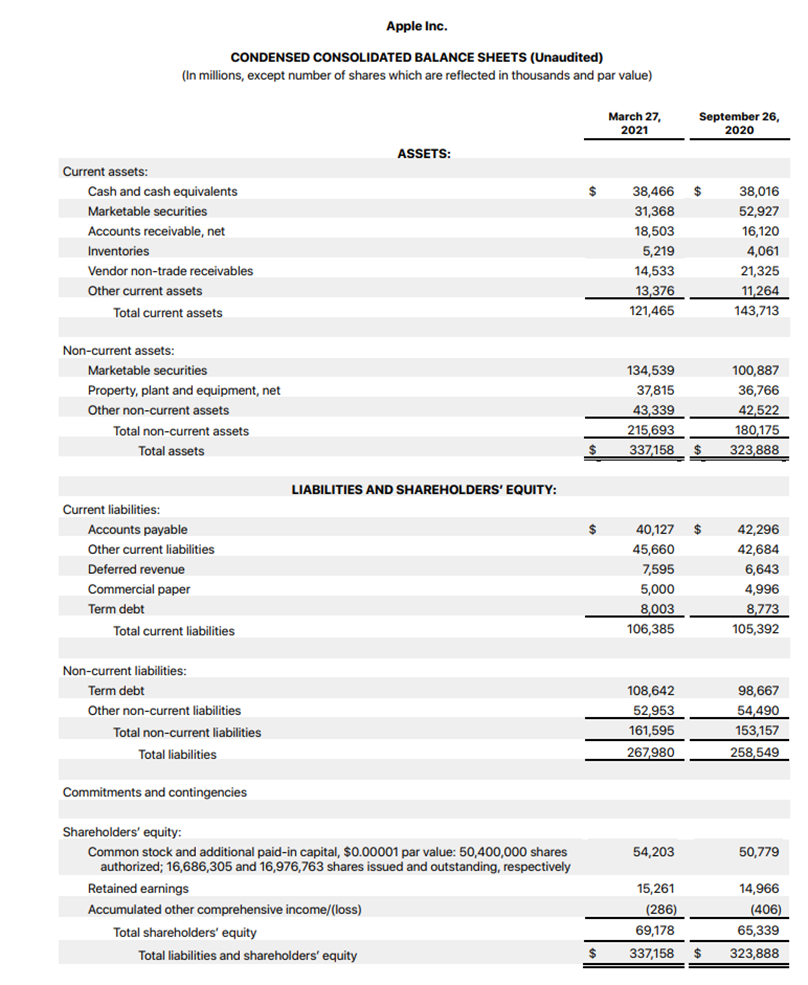

__Income Statement__

In [ ]:
inc_stat = aapl.get_income_stmt() / 1000000 # (in million USD) yfinance
inc_stat

In [ ]:
inc_stat = yq.income_statement().T # yahooquery
inc_stat

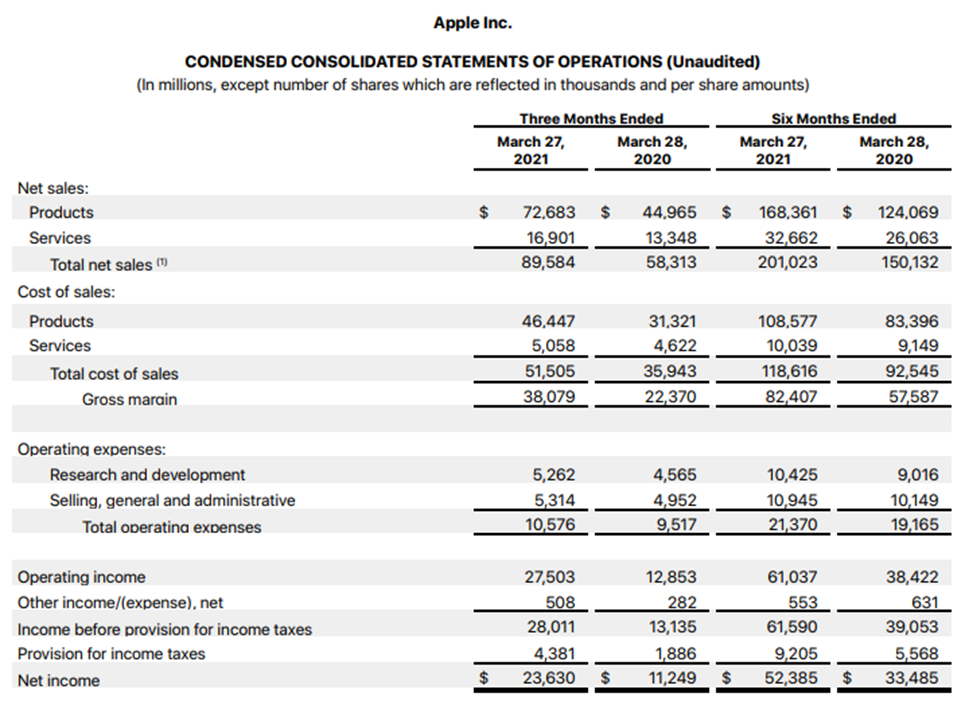

__Cashflow Statement__

In [ ]:
cf = aapl.get_cashflow() / 1000000 # (in million USD) #yfinance
cf

In [ ]:
cf = yq.cash_flow().T #yahooquery
cf

__Quarterly Statements__

In [ ]:
aapl.quarterly_balance_sheet #yfinance

In [ ]:
aapl.quarterly_income_stmt #yfinance

In [ ]:
aapl.quarterly_cashflow #yfinance

In [ ]:
yq.balance_sheet(frequency = "q").T #yahooquery

In [ ]:
yq.income_statement(frequency = "q").T #yahooquery

In [ ]:
yq.cash_flow(frequency = "q").T #yahooquery